Test 1: plot secant curve to visualize root finding

4499626.025702862 4499563.169479499
4499626.025702863 4499563.169479498
4499626.025702862 4499563.169479498
4499626.025702863 4499563.169479497
4499626.025702863 4499563.169479496
4499626.025702863 4499563.169479496
4499626.025702863 4499563.169479495
4499626.025702863 4499563.169479494
4499626.025702863 4499563.169479493
4499626.025702863 4499563.169479492
4499626.025702863 4499563.169479492
4499626.025702863 4499563.16947949
4499626.025702863 4499563.16947949
4499626.025702863 4499563.169479489
4499626.025702864 4499563.169479489
4499626.025702864 4499563.169479488
4499626.025702864 4499563.169479487
4499626.025702864 4499563.1694794865
4499626.025702864 4499563.1694794865
4499626.025702864 4499563.169479486
4499626.025702864 4499563.169479485
4499626.025702864 4499563.169479485
4499626.025702864 4499563.169479483
4499626.025702864 4499563.169479483
4499626.025702865 4499563.169479482
4499626.025702865 4499563.169479482
4499626.025702864 4499563.169479481
4499626.025702865 4499563.16

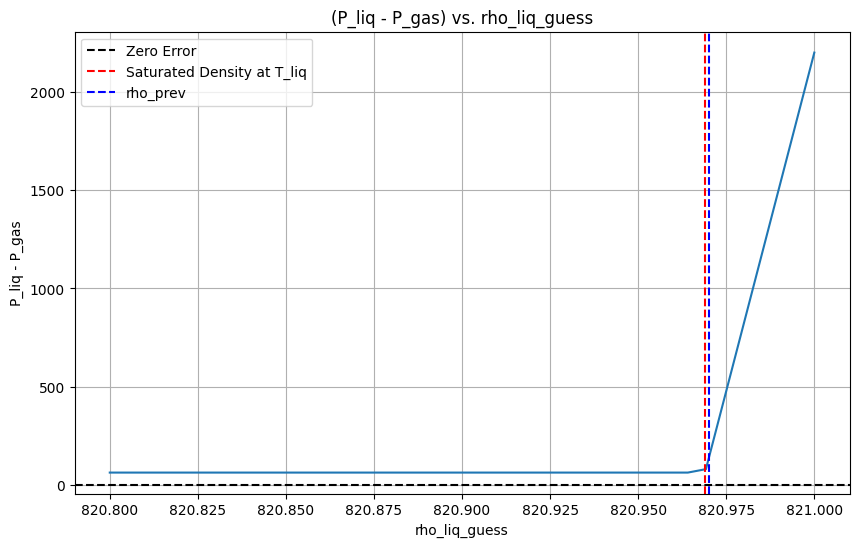

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP


def secant(func, x1):
    x_eps = x1 * 0.005  # Set the tolerance to be 0.5% of init guess
    x2 = x1 -x1 * 0.01  # Set a second point 1% away from the original guess
    F1 = func(x1)  # Evaluate function at x1
    F2 = func(x2)  # Evaluate function at x2
    kk = 1  # Set up counter
    kk_max = 1000

    while np.abs(x2 - x1) >= (x_eps) and kk < kk_max:  # While error is too large and counter is less than max
        x3 = x2 - (F2 * (x2 - x1) / (F2 - F1)) 
        x1 = x2  # Move everything forward
        x2 = x3
        F1 = F2
        F2 = func(x2) 
        if (F1 == F2):
            return x2
        kk = kk + 1
    x = x2
    return x



def P_tank_error(rho_liq_guess, T_liq, T_gas, m_liq, m_gas, V_tank):
    #print("rho_liq: ", rho_liq_guess)

    P_liq_est = CP.PropsSI('P', 'D', rho_liq_guess, 'T', T_liq, 'N2O')

    rho_gas_est = m_gas / (V_tank - (m_liq/rho_liq_guess) ) ### I THINK I NEED MORE LOGIC HERE TO MAKE SURE WE NEVER GET A m_liq/rho_liq_guess > V_tank

    P_gas_est = CP.PropsSI('P', 'D', rho_gas_est, 'T', T_gas, 'N2O')

    #print("P error: ", P_liq_est - P_gas_est)

    V_liq = (m_liq/rho_liq_guess)
    V_gas = (m_gas/rho_gas_est)

    #print("Node Volumes: ", V_liq, V_gas, "Volume constraint: ", V_tank - (V_liq + V_gas))

    #print("Pressures at liq / gas node: ", P_liq_est, P_gas_est, P_liq_est-P_gas_est)

    #liq_phase = CP.PhaseSI('T', T_liq, 'P', P_liq_est, 'N2O')
    #gas_phase = CP.PhaseSI('T', T_gas, 'P', P_gas_est, 'N2O')
    #print("densities: (liq, gas): ", rho_liq_guess, P_liq_est, liq_phase, rho_gas_est, P_gas_est, gas_phase)

    print(P_liq_est, P_gas_est)

    return P_liq_est - P_gas_est


"""
def solve_thermo_params(T_liq, T_gas, m_liq, m_gas, rho_liq_prev, V_tank, P_tank_err_tolerance):

    rho_liq = rho_liq_prev #initial guess for rho_liq

    #print("rho_liq_prev: ", rho_liq_prev)

    while np.abs(P_tank_error(rho_liq, T_liq, T_gas, m_liq, m_gas, V_tank) ) > P_tank_err_tolerance:
        rho_liq = secant((lambda P: P_tank_error(P, T_liq, T_gas, m_liq, m_gas, V_tank)), rho_liq)

    P_tank = CP.PropsSI('P', 'D', rho_liq, 'T', T_liq, 'N2O')

    rho_gas = m_gas / (V_tank - (m_liq/rho_liq) )

    return rho_liq, rho_gas, P_tank
"""

### initial conditions
P_tank = 43e5 #Pa
T_liq = CP.PropsSI('T', 'P', P_tank, 'Q', 0, 'N2O') + 0.003 # K         # Perterb to start off of saturation curve
T_gas = CP.PropsSI('T', 'P', P_tank, 'Q', 1, 'N2O') - 0.003 # K
m_liq = 18.231680203303263    # kg
m_gas = 1.7683197966967383    # kg
rho_liq_prev =  820.970209097243  # kg/m^3
V_tank = 0.0354 #m^3
P_tank_err_tolerance = 100.0  # Pa
rho_prev = 820.970209097243
rho_sat = CP.PropsSI('D', 'P', P_tank, 'Q', 0, 'N2O')


### initial conditions
T_liq = 288.11101589488993
T_gas = 288.1104168948341
m_liq = 18.230742703303267
m_gas = 1.7683197966967383
rho_sat = CP.PropsSI('D', 'T', T_liq, 'Q', 0, 'N2O')
rho_prev = 820.970209097243
V_tank = 0.0354
P_tank_err_tolerance = 200
lower_bound = 819.970209097243
upper_bound = 821.970209097243




# Wrapper for plotting
def P_err_wrapper(rho):
    P_err = -1e7

    try:
        P_err = P_tank_error(rho, T_liq, T_gas, m_liq, m_gas, V_tank)
    except Exception as e:
        print(f"Skipped rho = {rho:.2f}: {e}")

    return P_err


# Plot over a range of rho_liq guesses
rho_range = np.linspace(820.8, 821, 40)
errors = [P_err_wrapper(rho) for rho in rho_range]



plt.figure(figsize=(10, 6))
plt.plot(rho_range, errors)
plt.axhline(0, color='k', linestyle='--', label='Zero Error')
plt.axvline(rho_sat, color='r', linestyle='--', label='Saturated Density at T_liq')
plt.axvline(rho_prev, color='b', linestyle='--', label='rho_prev')
plt.xlabel('rho_liq_guess')
plt.ylabel('P_liq - P_gas')
plt.title('(P_liq - P_gas) vs. rho_liq_guess')
plt.legend()
plt.grid(True)

